# Lagrangian Mechanics

Author: Michael Greer

This notebook serves as an introduction to Lagrangian Mechanics. This provides a method of solving the mechanics of a system using the Euler-Lagrange equation. This approach is often compared to Newtonian Mechanics, which considers the system based on Newton's laws of motion.

The first step when formulating the Lagrangian Mechanics is to find the generalized coordinates of your system. These are all of the values you need to fully specify the stationary position of a system at any given time. Note that this is different from states of a system, since the generalized coordinates do not describe velocity. The number of coordinates necessary will match the number of degrees of freedom present in the system. Some brief examples:

1. A mass that can move along one axis would need one generalized coordinate
2. A mass that can move along two axes would need two generalized coordinates
3. A simple pendulum needs one generalized coordinate
4. A 6-DOF robot arm would need six generalized coordinates

We typically refer to these using $q_{n}$ and we can stack these into a vector via:

$$q=\begin{bmatrix}q_{1} \\ q_{2} \\ ... \\ q_{n} \end{bmatrix}$$

Systems move through the generalized coordinate space (also known as configuration space) with respect to time, so we can also consider a generalized velocity:

$$\dot{q}=\frac{dq}{dt}$$

The next step is to generate the Lagrangian function. This function relies on the kinetic and potential energies in the form of:

$$L(q,\dot{q})=K(q,\dot{q})-P(q,\dot{q})$$

This is input into the Euler-Lagrange equation in the form:

$$\frac{\partial L}{\partial q} - \frac{d}{dt}\frac{\partial L}{\partial \dot{q}}=0$$

Since this is equal to zero, we can equivalently use:

$$\frac{d}{dt}\frac{\partial L}{\partial \dot{q}}-\frac{\partial L}{\partial q}=0$$

This relation essentially states that the total energy in the system must remain unchanged. After obtaining this relation, we can add in non-conserving forces like torque inputs or friction. 

This may seem complicated compared to newtonian mechanics, but remember that we only need to consider the total energy of the system. This usually comes down to only four considerations:

1. Linear Kinetic Energy (Translational)
2. Angular Kinetic Energy (Rotational)
3. Gravitational Potential Energy 
4. Elastic Potential Energy

In addition, these are all scalar values so we can largely avoid the hassle of working with vectors. This holds true for any number of forces the rigid bodies may be exerting on each other, which is what can make newtonian mechanics more complicated.

### Mass-Spring System ###

Let's begin by deriving the mechanics of a mass-spring system. This is easy enough to do using newtonian mechanics, so it will serve as a good comparison. Via newtonian mechanics, the relation is:

$$ma=-kx$$

This relates the acceleration of the mass with the force provided by compressing the spring. If we consider this in terms of the generalized coordinate q (the position of the mass) and solve for acceleration, this becomes:

$$\ddot{q}=\frac{-kq}{m}$$

Moving on to Lagrangian Mechanics, we need to find the kinetic and potential energies of the system. For this, we need only consider the linear kinetic energy and the elastic potential energy.

$$K=\frac{1}{2}m\dot{q}^{2}$$

$$P=\frac{1}{2}kq^{2}$$

The Lagrangian function is:

$$L=K-P=\frac{1}{2}m\dot{q}^{2}-\frac{1}{2}kq^{2}$$

Plugging in to the Euler-Lagrange equation:

$$\frac{dL}{dq}=-kq$$

$$\frac{dL}{d\dot{q}}=m\dot{q}$$

$$\frac{d}{dt}\frac{\partial L}{\partial \dot{q}}=m\ddot{q}$$

$$\frac{\partial L}{\partial q} - \frac{d}{dt}\frac{\partial L}{\partial \dot{q}}=-kq-m\ddot{q}=0$$

$$\ddot{q}=\frac{-kq}{m}$$

As we can see, the two results obtained using the two methods match. This is not a rigorous proof, but it does show how the two equations align in this case.

### Cart-Pole Mechanics ###

The next example derives the mechanics for the classic cart-pole control problem. It consists of a pendulum who's center of rotation can move linearly on one axis. See illustration below.

![title](cart_pole.png)

The first coordinate specifies the linear position of the cart, and the second coordinate specifies the angle of rotation of the pendulum. A common control systems problem would be to stabilize the system in the "pendulum up" position by moving the cart, effectively balancing the system about an unstable equilibrium.

The calculations for this example are performed using python's symbolic math library for simplicity.

In [11]:
import numpy as np
from numpy import pi, sin, cos

import matplotlib.pyplot as plt

import sympy as sp

In [12]:
# Define necessary variables
t = sp.Symbol('t')
g = sp.Symbol('g')

# We need the symbolic library to know what each coordinate is a function of time
q1 = sp.Function('q1')(t)
q2 = sp.Function('q2')(t)

# To get the first derivitives, just derive with respect to time
q1_dot = sp.diff(q1, t)
q2_dot = sp.diff(q2, t)

In [13]:
# Properties, you can change these to be whatever mass or length necessary

mc = 2 # Mass of cart
mp = 2 # Mass of pendulum
l = 2 # Length of pendulum

# Moment of Inertia of the pendulum about it's center
I = (1/12) * mp * l**2

# Linear velocities of the center of mass of the pendulum
x_dot = q1_dot - (l/2)*sp.cos(q2)*q2_dot
y_dot = -1*(l/2)*sp.sin(q2)*q2_dot

# magnitude of velocity of the center of mass of the pendulum
c_dot_squared = x_dot**2 + y_dot**2

# Kinetic Energy
# The kinetic energy is the sum of the angular and linear kinetic energy of the pendulum

K = (1/2)*mc*q1_dot**2 + (1/2)*mp*(c_dot_squared) + (1/2)*I*q2_dot**2

# Potential Energy
# This is only the gravitational potential energy of the pendulum
P = mp * l * sp.cos(q2) * g

# The Lagrangian function
L = K - P

In [15]:
# Differentiate in the same way as shown in the equation

eq_1 = sp.diff(sp.diff(L, q1_dot), t) - sp.diff(L, q1)
eq_2 = sp.diff(sp.diff(L, q2_dot), t) - sp.diff(L, q2)

eq_1 = sp.simplify(eq_1)
eq_2 = sp.simplify(eq_2)

print(eq_1)
print(eq_2)

2.0*sin(q2(t))*Derivative(q2(t), t)**2 - 2.0*cos(q2(t))*Derivative(q2(t), (t, 2)) + 4.0*Derivative(q1(t), (t, 2))
-4.0*g*sin(q2(t)) - 2.0*cos(q2(t))*Derivative(q1(t), (t, 2)) + 2.66666666666667*Derivative(q2(t), (t, 2))


Simplifying this result, we get:

$$0=2sin(q_{2})\dot{q_{2}}^{2}-2cos(q_{2})\ddot{q_{2}}+4\ddot{q_{1}}$$
$$0=-4gsin(q2)-2cos(q_{2})\ddot{q_{1}}+2.66667\ddot{q_{2}}$$

If we group this result into matrix form, we get a much cleaner:

$$0=D(q)\ddot{q}+C(q,\dot{q})\dot{q}+g(q)$$

With:

$$D=\begin{bmatrix}4 & -2cos(q_{2}) \\ -2cos(q_{2}) & 2.66667 \end{bmatrix}$$

$$C=\begin{bmatrix}0 & 2sin(q_{2}) \\ 0 & 0 \end{bmatrix}$$

$$g=\begin{bmatrix}0 \\ -4gsin(q_{2}) \end{bmatrix}$$

This is the standard form in which we consider the dynamics of robotic systems. Due to Newton's third law, the D matrix will always be symmetric. This is a good way to quickly check your work.

In order to simulate this system, we need to isolate the $\ddot{q}$ terms. In matrix form, this is an easy task:

$$\ddot{q}=D(q)^{-1}( - C(q,\dot{q})\dot{q} - g(q))$$

In [16]:
def D(q):
    
    q1 = q[0]
    q2 = q[1]
    
    D11 = 4.0
    D12 = (-2 * cos(q2))[0]
    D21 = (-2 * cos(q2))[0]
    D22 = 2.66667
    
    D_mat = np.array([[D11, D12],
                      [D21, D22]])
    
    return D_mat

def C(q, q_dot):
    
    q1 = q[0]
    q2 = q[1]
    
    q1_dot = q_dot[0]
    q2_dot = q_dot[1]
    
    C11 = 0.0
    C12 = (2 * sin(q2)*q2_dot)[0]
    C21 = 0.0
    C22 = 0.0
    
    C_mat = np.array([[C11, C12],
                      [C21, C22]])

    return C_mat

def g(q):
    
    q1 = q[0]
    q2 = q[1]
    
    g1 = 0.0
    g2 = (-4 * 9.8 * sin(q2))[0]
    
    g_mat = np.array([[g1],
                      [g2]])
    
    return g_mat

In [17]:
def dydt(y, t):
    
    q = y[0:2]
    q_dot = y[2:4]
        
    q_ddot = (np.linalg.inv(D(q))) @ (-1*C(q, q_dot)@q_dot - g(q))
    
    y_dot = np.zeros((4,1))
    
    y_dot[0:2] = q_dot
    y_dot[2:4] = q_ddot
    
    #print(q_ddot)
    
    #print()
    
    return y_dot

In [18]:
# This function plots each of the states of the system
def plot_states(y):
    
    fig,a =  plt.subplots(2,2,figsize = (12,12))

    a[0][0].plot(y_trace[:,0])
    a[0][0].set_title('Position 1')
    
    a[0][1].plot(y_trace[:,1])
    a[0][1].set_title('Position 2')
    
    a[1][0].plot(y_trace[:,2])
    a[1][0].set_title('Velocity 1')
    
    a[1][1].plot(y_trace[:,3])
    a[1][1].set_title('Velocity 2')

    plt.show()

Now we can simulate the system using a fourth order Runge-Kutta ODE solver.

In [19]:
from runge_kutta_step import *

# Initial conditions
y = np.array([[0] , [pi/2] , [0] , [0]])

t = 0

h = 0.005

simtime = 10

y_trace = []

for i in range(int(simtime/h)):
    
    (y, t) = runge_kutta_step(dydt, y, t, h)
    
    if ((h*i) % (simtime/10) == 0):
        print("time: {}".format(h * i))
    
    y_trace.append(y)

y_trace = np.array(y_trace).reshape((-1,4))

print(y_trace.shape)

time: 0.0
time: 1.0
time: 2.0
time: 3.0
time: 4.0
time: 5.0
time: 6.0
time: 7.0
time: 8.0
time: 9.0
(2000, 4)


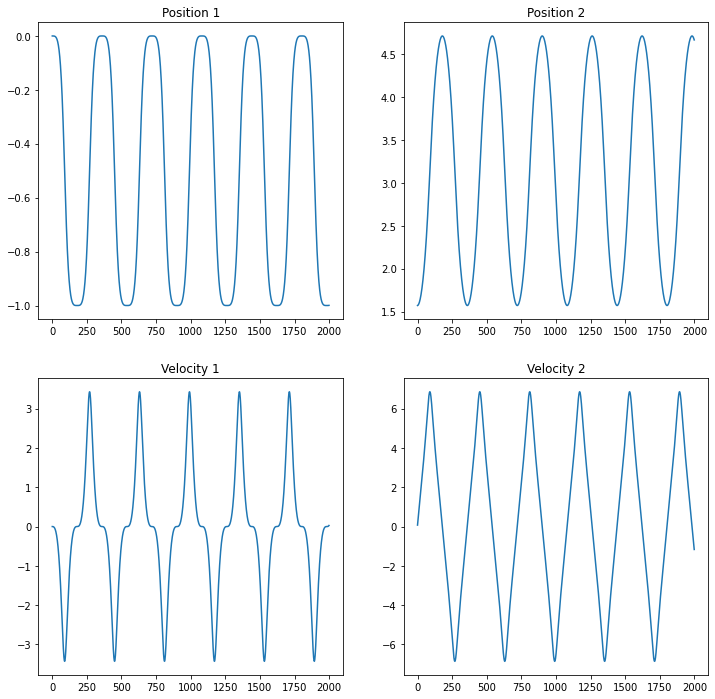

In [20]:
plot_states(y_trace)

This result makes sense, as we see oscillating motion in both the position of the cart and the position of the pendulum. We can see the mass of the pendulum pushing the cart in the opposite direction as the swing. At the height of the pendulum's swing (where the system has the most potential energy), the velocities of both coordinates are zero. The times at maximum potential energy should align with the times at minimum kinetic energy, and vice-versa.

An easy way to tell if you've made a calculation error is if the system seems to be gaining energy from some unknown source. This could manifest as the pendulum swinging higher than it's starting position or the cart accelerating constantly in one direction.

### Torque Inputs ###

So far, we have only considered forces in the system that do not add or remove total energy. But, how do we model something like a motor acting at a joint? This is very common in robotics, and Lagrangian Mechanics has a way to handle it, by replacing the zero with our generalized torque term:

$$\frac{d}{dt}\frac{\partial L}{\partial \dot{q}}-\frac{\partial L}{\partial q}=\tau$$

Generalized torque works the same way as generalized coordinates, it is either a linear force or a rotational torque depending on if the original coordinate is a linear or rotational measurement. If we use this equation for the cart-pole problem, our differential equation becomes:

$$\ddot{q}=D(q)^{-1}(\tau - C(q,\dot{q})\dot{q} - g(q))$$

Let's re-evaluate the cart-pole simulation, but now we can apply a slight oscillating force to the cart.

In [30]:
def dydt_torque(y, t):
    
    q = y[0:2]
    q_dot = y[2:4]
    
    tau = np.zeros((2,1))
    
    tau[0] = 0.01 * sin(t)
        
    # Note the added torque term
    q_ddot = (np.linalg.inv(D(q))) @ (tau - C(q, q_dot)@q_dot - g(q))
    
    y_dot = np.zeros((4,1))
    
    y_dot[0:2] = q_dot
    y_dot[2:4] = q_ddot
    
    #print(q_ddot)
    
    #print()
    
    return y_dot

In [31]:
from runge_kutta_step import *

# Initial conditions
y = np.array([[0] , [pi] , [0] , [0]])

t = 0

h = 0.005

simtime = 10

y_trace = []

for i in range(int(simtime/h)):
    
    (y, t) = runge_kutta_step(dydt_torque, y, t, h)
    
    if ((h*i) % (simtime/10) == 0):
        print("time: {}".format(h * i))
    
    y_trace.append(y)

y_trace = np.array(y_trace).reshape((-1,4))

print(y_trace.shape)

time: 0.0
time: 1.0
time: 2.0
time: 3.0
time: 4.0
time: 5.0
time: 6.0
time: 7.0
time: 8.0
time: 9.0
(2000, 4)


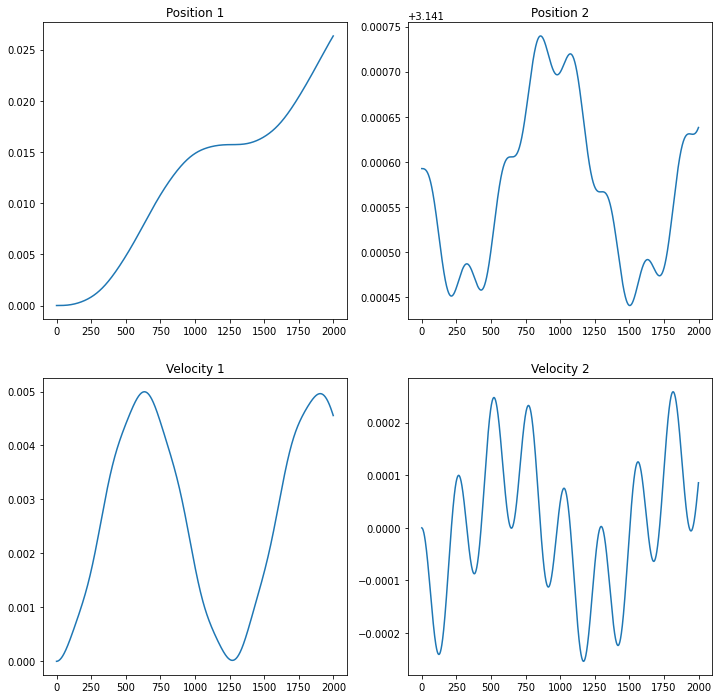

In [32]:
plot_states(y_trace)

This result makes sense, since our forcing input follows a sinusoid, we would expect our velocity to follow a sinusoid as well. The velocity of the cart is not a perfect sinusoid since it's motion is affected by the motion of the pendulum.